In [1]:
import json
import matplotlib.pyplot as plt
import preprocess_snu_fact
import numpy as np

In [2]:
df = preprocess_snu_fact.load_df_est()
# print(df['rag'][0])
df

loaded facts 4700


,is_fact,score,issue_date,message,search_term,rag,estimation_truth,estimation_average,estimation_vote,estimation_max,estimation_first
0,False,2,2017-03-29 11:11:34+09:00,"""대통령선거 본선에 나가기 직전에 사표를 제출하면 보궐선거는 없다""",대통령선거 본선사퇴 후 보궐선거 없음,=== 구글 검색 결과 (검색어: 대통령선거 본선사퇴 후 보궐선거 없음) ===\n...,2,-1.0,-1,-1,-1
1,True,4,2017-04-19 18:05:27+09:00,“홍준표 ‘(지지율) 20% 넘어’ 발언은 선거법 위반”은 사실?,홍준표 지지율 20% 넘어 선거법 위반,=== 구글 검색 결과 (검색어: 홍준표 지지율 20% 넘어 선거법 위반) ===...,4,4.0,4,4,4
2,False,2,2017-04-19 18:08:45+09:00,"""문재인, 담뱃값 인하 입장 철회""는 사실?",문재인 담뱃값 인하 입장 철회,=== 구글 검색 결과 (검색어: 문재인 담뱃값 인하 입장 철회) ===\n\n> ...,2,-1.0,-1,-1,-1
3,False,1,2017-04-19 18:25:30+09:00,"""안철수 국민의당 후보가 예비군 훈련을 한 번도 참석하지 않았다""는 다른 정당의 주...","안철수, 국민의당, 예비군 훈련, 참석, 주장 검증","=== 구글 검색 결과 (검색어: 안철수, 국민의당, 예비군 훈련, 참석, 주장 검...",1,-1.0,-1,-1,-1
4,False,2,2017-04-19 18:40:48+09:00,"洪 ""한국, 비정규직 더 많고 직원 해고하기 세계에서 가장 어려워""",非正規職員 한국에서 더 많음 해고하기 어려움,=== 구글 검색 결과 (검색어: 非正規職員 한국에서 더 많음 해고하기 어려움) =...,2,-1.0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
4073,False,1,2024-05-07 15:29:52+09:00,"지금까지 13차례 특검이 도입됐지만, 여야 합의 없이 이뤄진 사례는 단 한 차례도 없다",특검 13차례 여야 합의 없이 사례,=== 구글 검색 결과 (검색어: 특검 13차례 여야 합의 없이 사례) ===\n\...,1,1.0,1,1,1
4074,False,2,2024-05-08 17:38:32+09:00,특검은 기존 수사가 종료된 이후에 도입한다,특별검사 도입 기존 수사가 종료된 이후,=== 구글 검색 결과 (검색어: 특별검사 도입 기존 수사가 종료된 이후) ===\...,2,1.0,1,1,1
4075,True,5,2024-05-09 10:49:15+09:00,대한민국은 현재 교제 폭력을 따로 규제하는 법안이 없으며 법적 정의조차 모호하다,대한민국 교제 폭력 법안 법적 정의,=== 구글 검색 결과 (검색어: 대한민국 교제 폭력 법안 법적 정의) ===\n\...,5,0.0,0,0,0
4076,True,5,2024-05-17 14:39:04+09:00,야당(민주당)도 집권기에 특검 반대했다,"야당, 민주당, 집권기, 특검, 반대","=== 구글 검색 결과 (검색어: 야당, 민주당, 집권기, 특검, 반대) ===\n...",5,3.0,3,3,3


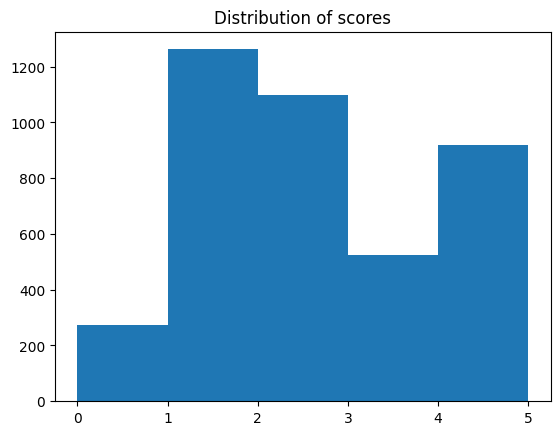

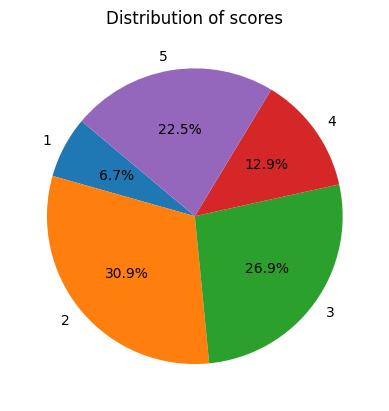

In [3]:
plt.title('Distribution of scores')
c, b, p = plt.hist(df['score'], bins=5)
plt.show()

plt.title('Distribution of scores')
labels = [f'{b[i]:.1f} - {b[i+1]:.1f}' for i in range(len(b)-1)]
plt.pie(c, labels=[f'{i+1}' for i in range(len(c))], autopct='%1.1f%%', startangle=140)
plt.show()

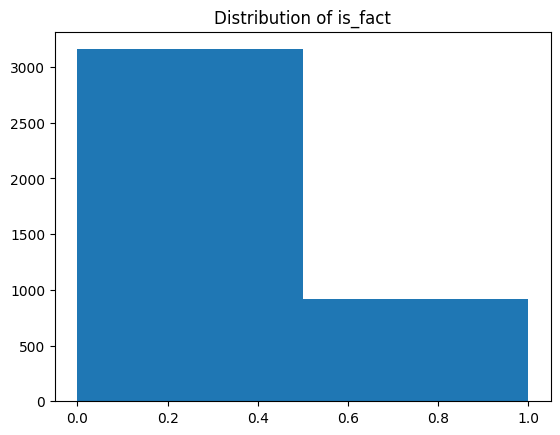

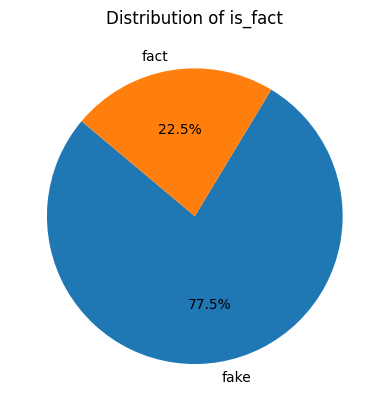

fact percent 22.53555655479431


In [4]:
plt.title('Distribution of is_fact')
xs = df['is_fact'].to_numpy().astype(np.int32)

c, b, p = plt.hist(xs, bins=2)
plt.show()

plt.title('Distribution of is_fact')
labels = [f'{b[i]:.1f} - {b[i+1]:.1f}' for i in range(len(b)-1)]
plt.pie(c, labels=['fake', 'fact'], autopct='%1.1f%%', startangle=140)
plt.show()

print('fact percent', df['is_fact'].to_numpy().astype(np.float32).mean() * 100)

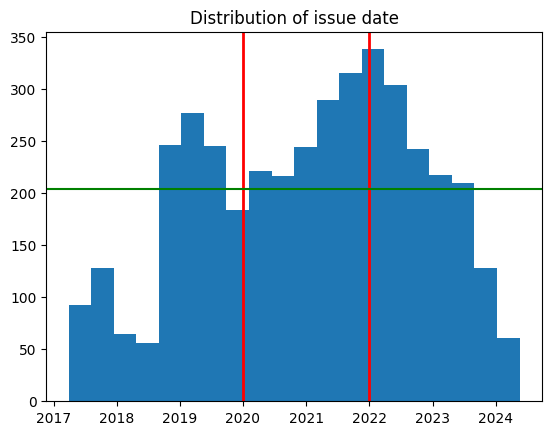

In [6]:
from datetime import datetime

plt.title('Distribution of issue date')
out = plt.hist(df['issue_date'], bins=20)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axhline(out[0].mean(), color='green')
plt.show()

In [7]:
# TODO: traffic

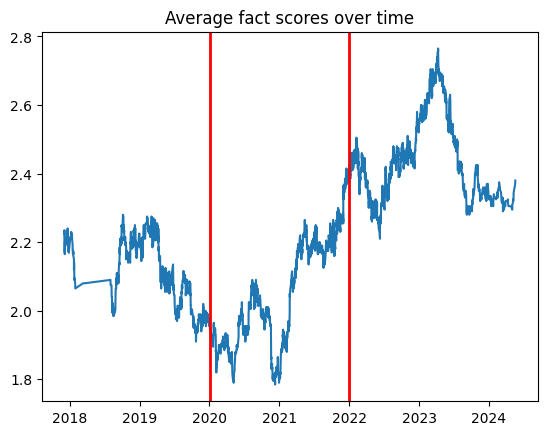

In [8]:
from datetime import datetime

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

ma_window_size = 200

ys = df['score'].to_numpy()
ys = moving_average(ys, ma_window_size)
xs = df['issue_date'][ma_window_size-1:]

plt.title('Average fact scores over time')
plt.plot(xs, ys)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.annotate('COVID-19', (datetime(2020, 3, 1, 0, 0, 0), 2.95), fontsize=16)
plt.show()

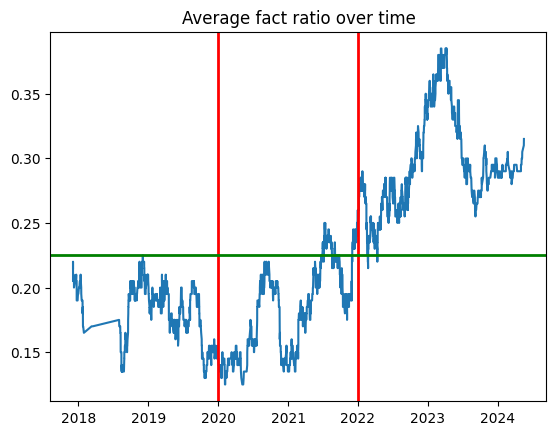

In [9]:
ma_window_size = 200

ys = df['is_fact'].to_numpy().astype(np.float32)
ys = moving_average(ys, ma_window_size)
xs = df['issue_date'][ma_window_size-1:]

plt.title('Average fact ratio over time')
plt.plot(xs, ys)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axhline(0.225, color='green', linewidth=2.0)
plt.annotate('COVID-19', (datetime(2020, 3, 1, 0, 0, 0), 0.4), fontsize=16)
plt.show()

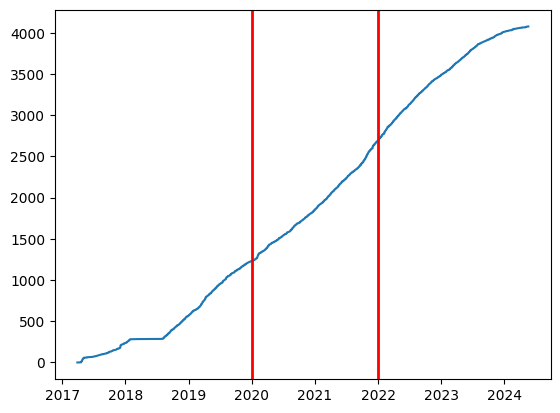

In [10]:
counts = np.arange(len(df['message']))
ys = df['issue_date']
plt.plot(ys, counts)
plt.axvline(datetime(2020, 1, 1, 0, 0, 0), color='red', linewidth=2.0)
plt.axvline(datetime(2022, 1, 1, 0, 0, 0), color='red', linewidth=2.0)

acc 23.493657505285412
corr SignificanceResult(statistic=0.14683937144627188, pvalue=1.095988613126135e-19)


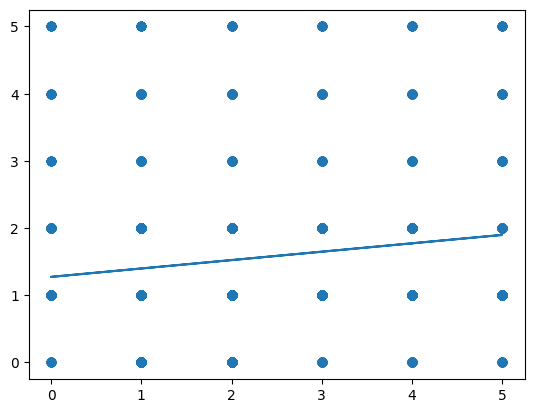

In [11]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score
mask = np.logical_and(
    df['estimation_vote'].notna().to_numpy(),
    (df['estimation_vote'].to_numpy() >= 0)
)
trim = 4077
xs = df['score'][mask][:trim]
ys = df['estimation_first'][mask][:trim]
plt.scatter(xs, ys)

m, b = np.polyfit(xs, ys, 1)
plt.plot(xs, m*xs+b)

print('acc', (xs == ys).mean() * 100)
print('corr', spearmanr(xs, ys))

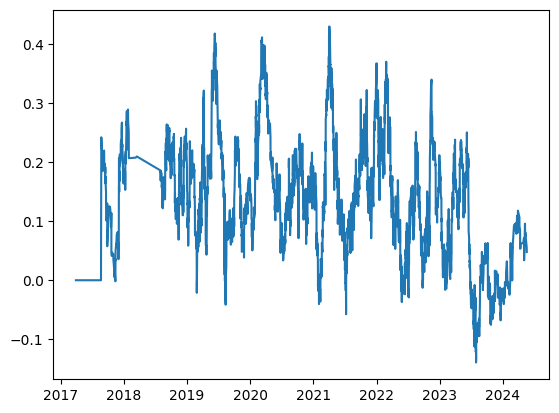

In [12]:
ys_est = df['estimation_first'].to_numpy()
ys_truth = df['score'].to_numpy()

wnd = 100
corrs = [0] * wnd
for i in range(wnd, len(ys_est)):
    ys_est_wnd = ys_est[i-wnd:i]
    ys_truth_wnd = ys_truth[i-wnd:i]
    corrs.append(spearmanr(ys_est_wnd, ys_truth_wnd)[0])

plt.plot(df['issue_date'], corrs)

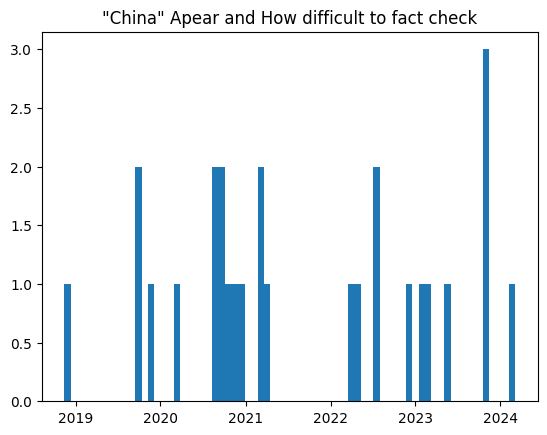

475                                  "오진 결과만으로 의사가 구속됐다"?
1106                         환자 착각하여 낙태한 의사, 면허 박탈 가능하다? 
1118                                   피의사실공표죄, 한국에만 있다? 
1177                         "귀순 의사를 밝힌 북한 주민은 우리 국민이 된다"
1363                        ‘美 CDC 코로나19 주의사항 10가지’, 사실이다
1606                         의사수가 부족하다고 볼 아무런 객관적인 근거가 없다
1654                   군의관은 의사 국가고시 실기시험 채점위원을 할 수 없다\r\n
1664                             의사는 강력범죄를 저질러도 면허가 유지된다.
1665                                     북한에 의사 강제파견 추진한다
1736                    의대생 국가고시 못 보면 5년간 의사 1만3500명 부족하다
1796                       “공공의대 예산 편성은 의사협회와 약속 위반이 아니다”
1839                        코로나 환자 돌보는 의사·간호사 일당 1만4600원?
1968                       모든 범죄 '금고이상'시 의사면허 박탈, 형평성 위배다
1972                                코로나19 백신 접종은 의사만 가능하다
2024                       의사의 음주 의료행위를 현행법으로 형사 처벌할 수 있다
2916                            한의사가 코로나19 검사하면 무면허 의료행위다
3011                           의사진행발언은 본회의 안건 표결 전에 해야 한다
3167          

In [21]:
keywords = ['미국 대선', '트럼프', '바이든', '클린튼', '공화당'] # US Election
keywords = ['한국 대선', '2024 대선', '윤석열', '이재명'] # KR Election
keywords = ['코로나', 'COVID'] # COVID
keywords = ['트럼프', '도날드 트럼프', '도널드 트럼프', 'Trump'] # Trump

mask = [any([k in m for k in keywords]) for m in df['message']]
dates = df['issue_date'][mask]
plt.hist(dates, bins=70)
plt.title(f'"{keywords[0]}" Apear and How difficult to fact check')
plt.show()

ys_est = df['estimation_first'][mask].to_numpy()
ys_truth = df['score'][mask].to_numpy()
print(df['message'][mask])
# print('\n'.join(df['message'][mask].tolist()))
print(spearmanr(ys_est, ys_truth))
print(len(df['message'][mask]))

In [ ]:
('')

''